In [1]:
%%info

In [2]:
#Checking the packages

sc.list_packages()

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1682355252496_0001,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version  
-------------------------- ---------
beautifulsoup4             4.9.1    
boto                       2.49.0   
click                      7.1.2    
jmespath                   0.10.0   
joblib                     0.16.0   
lxml                       4.5.2    
mysqlclient                1.4.2    
nltk                       3.5      
nose                       1.3.4    
numpy                      1.16.5   
pip                        9.0.1    
py-dateutil                2.2      
python37-sagemaker-pyspark 1.4.0    
pytz                       2020.1   
PyYAML                     5.3.1    
regex                      2020.7.14
setuptools                 28.8.0   
six                        1.13.0   
soupsieve                  1.9.5    
tqdm                       4.48.2   
wheel                      0.29.0   
windmill                   1.6

In [3]:
#Installing some packages 

sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("matplotlib==3.2.1")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Loading Data

In [5]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("IMDB Data Analysis") \
    .getOrCreate()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [6]:
# Provided S3 paths
name_basics_path = "s3://cis9760-lecture9-movieanalysis/name.basics.tsv"
title_basics_path = "s3://cis9760-lecture9-movieanalysis/title.basics.tsv"
title_principals_path = "s3://cis9760-lecture9-movieanalysis/title.principals.tsv"
title_ratings_path = "s3://cis9760-lecture9-movieanalysis/title.ratings.tsv"

actors_df = spark.read.csv(name_basics_path, sep=r'\t', header=True)
genres_df = spark.read.csv(title_basics_path, sep=r'\t', header=True)
movie_actors_df = spark.read.csv(title_principals_path, sep=r'\t', header=True)
movie_ratings_df = spark.read.csv(title_ratings_path, sep=r'\t', header=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Actors

In [7]:
actors_df.printSchema()
print(actors_df.columns)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- nconst: string (nullable = true)
 |-- primaryName: string (nullable = true)
 |-- birthYear: string (nullable = true)
 |-- deathYear: string (nullable = true)
 |-- primaryProfession: string (nullable = true)
 |-- knownForTitles: string (nullable = true)

['nconst', 'primaryName', 'birthYear', 'deathYear', 'primaryProfession', 'knownForTitles']

In [8]:
actors_df.select("primaryName", "birthYear", "deathYear", "knownForTitles").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------+---------+---------+--------------------+
|    primaryName|birthYear|deathYear|      knownForTitles|
+---------------+---------+---------+--------------------+
|   Fred Astaire|     1899|     1987|tt0050419,tt00531...|
|  Lauren Bacall|     1924|     2014|tt0071877,tt01170...|
|Brigitte Bardot|     1934|       \N|tt0054452,tt00491...|
|   John Belushi|     1949|     1982|tt0077975,tt00725...|
| Ingmar Bergman|     1918|     2007|tt0069467,tt00509...|
+---------------+---------+---------+--------------------+
only showing top 5 rows

# Genres

In [9]:
genres_df.select("titleType", "primaryTitle", "genres").show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------------------+--------------------+
|titleType|        primaryTitle|              genres|
+---------+--------------------+--------------------+
|    short|          Carmencita|   Documentary,Short|
|    short|Le clown et ses c...|     Animation,Short|
|    short|      Pauvre Pierrot|Animation,Comedy,...|
|    short|         Un bon bock|     Animation,Short|
|    short|    Blacksmith Scene|        Comedy,Short|
|    short|   Chinese Opium Den|               Short|
|    short|Corbett and Court...|         Short,Sport|
|    short|Edison Kinetoscop...|   Documentary,Short|
|    movie|          Miss Jerry|             Romance|
|    short| Exiting the Factory|   Documentary,Short|
+---------+--------------------+--------------------+
only showing top 10 rows

In [10]:
genres_df.select("titleType").distinct().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+
|   titleType|
+------------+
|    tvSeries|
|tvMiniSeries|
|       movie|
|   videoGame|
|   tvSpecial|
|       video|
|     tvMovie|
|   tvEpisode|
|     tvShort|
|       short|
+------------+

In [11]:
genres_df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- originalTitle: string (nullable = true)
 |-- isAdult: string (nullable = true)
 |-- startYear: string (nullable = true)
 |-- endYear: string (nullable = true)
 |-- runtimeMinutes: string (nullable = true)
 |-- genres: string (nullable = true)

# Movie Actors

In [12]:
movie_actors_df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- ordering: string (nullable = true)
 |-- nconst: string (nullable = true)
 |-- category: string (nullable = true)
 |-- job: string (nullable = true)
 |-- characters: string (nullable = true)

In [13]:
movie_actors_df.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------+---------+---------------+--------------------+-----------+
|   tconst|ordering|   nconst|       category|                 job| characters|
+---------+--------+---------+---------------+--------------------+-----------+
|tt0000001|       1|nm1588970|           self|                  \N|["Herself"]|
|tt0000001|       2|nm0005690|       director|                  \N|         \N|
|tt0000001|       3|nm0374658|cinematographer|director of photo...|         \N|
|tt0000002|       1|nm0721526|       director|                  \N|         \N|
|tt0000002|       2|nm1335271|       composer|                  \N|         \N|
|tt0000003|       1|nm0721526|       director|                  \N|         \N|
|tt0000003|       2|nm5442194|       producer|            producer|         \N|
|tt0000003|       3|nm1335271|       composer|                  \N|         \N|
|tt0000003|       4|nm5442200|         editor|                  \N|         \N|
|tt0000004|       1|nm0721526|       dir

# Movie Ratings

In [14]:
movie_ratings_df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- tconst: string (nullable = true)
 |-- averageRating: string (nullable = true)
 |-- numVotes: string (nullable = true)

In [15]:
from pyspark.sql import functions as F
movie_ratings_df.sort(F.desc("numVotes")).show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------+--------+
|   tconst|averageRating|numVotes|
+---------+-------------+--------+
|tt7430722|          6.8|    9999|
|tt4445154|          8.1|    9997|
|tt2229907|          6.3|    9996|
|tt0294097|          8.0|    9994|
|tt0264734|          6.5|    9993|
|tt8860450|          6.3|    9991|
|tt2032572|          5.2|    9991|
|tt2471626|          7.6|     999|
|tt3244036|          8.3|     999|
|tt2195566|          7.9|     999|
+---------+-------------+--------+
only showing top 10 rows

# Overview of Data

In [16]:
print("Number of columns in Actors table:", len(actors_df.columns))
print("Number of rows in Actors table:", actors_df.count())

print("Number of columns in Genres table:", len(genres_df.columns))
print("Number of rows in Genres table:", genres_df.count())

print("Number of columns in Movie Actors table:", len(movie_actors_df.columns))
print("Number of rows in Movie Actors table:", movie_actors_df.count())

print("Number of columns in Movie Ratings table:", len(movie_ratings_df.columns))
print("Number of rows in Movie Ratings table:", movie_ratings_df.count())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of columns in Actors table: 6
Number of rows in Actors table: 9706922
Number of columns in Genres table: 9
Number of rows in Genres table: 6321302
Number of columns in Movie Actors table: 6
Number of rows in Movie Actors table: 36468817
Number of columns in Movie Ratings table: 3
Number of rows in Movie Ratings table: 993153

# PART 2 - Analyzing Genres

In [17]:
from pyspark.sql.functions import split, col, explode

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [19]:
genres_sub = genres_df.select("tconst", "titleType", "genres").withColumn("genres", split(genres_df["genres"], ","))
association_table = genres_sub.select("tconst", "titleType", explode("genres").alias("genre"))

genres_sub.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+--------------------+
|   tconst|titleType|              genres|
+---------+---------+--------------------+
|tt0000001|    short|[Documentary, Short]|
|tt0000002|    short|  [Animation, Short]|
|tt0000003|    short|[Animation, Comed...|
|tt0000004|    short|  [Animation, Short]|
|tt0000005|    short|     [Comedy, Short]|
+---------+---------+--------------------+
only showing top 5 rows

In [20]:
association_table.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------+-----------+
|   tconst|titleType|      genre|
+---------+---------+-----------+
|tt0000001|    short|Documentary|
|tt0000001|    short|      Short|
|tt0000002|    short|  Animation|
|tt0000002|    short|      Short|
|tt0000003|    short|  Animation|
|tt0000003|    short|     Comedy|
|tt0000003|    short|    Romance|
|tt0000004|    short|  Animation|
|tt0000004|    short|      Short|
|tt0000005|    short|     Comedy|
+---------+---------+-----------+
only showing top 10 rows

# Total Unique Genres

**What is the total number of unique genres available in the movie category?**

In [21]:
association_table.filter(association_table["titleType"] == "movie").select("genre").distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

29

In [22]:
association_table.filter(association_table["titleType"] == "movie").select("genre").distinct().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|      genre|
+-----------+
|    Mystery|
|    Musical|
|      Sport|
|     Action|
|  Talk-Show|
|    Romance|
|   Thriller|
|         \N|
| Reality-TV|
|     Family|
|    Fantasy|
|    History|
|  Animation|
|      Short|
|  Film-Noir|
|     Sci-Fi|
|       News|
|      Drama|
|Documentary|
|    Western|
+-----------+
only showing top 20 rows

**Ops! We have a missing varible**

In [23]:
unique_genres=association_table.filter(association_table["titleType"] == "movie").select("genre").distinct()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [24]:
unique_genres = unique_genres.filter(unique_genres.genre != "\\N")
unique_genres.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+
|      genre|
+-----------+
|    Mystery|
|    Musical|
|      Sport|
|     Action|
|  Talk-Show|
|    Romance|
|   Thriller|
| Reality-TV|
|     Family|
|    Fantasy|
|    History|
|  Animation|
|      Short|
|  Film-Noir|
|     Sci-Fi|
|       News|
|      Drama|
|Documentary|
|    Western|
|     Comedy|
+-----------+
only showing top 20 rows

In [25]:
unique_genres.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

28

# Top Genres by Movies

In [26]:
from pyspark.sql.functions import avg

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [27]:
movies_at = association_table.filter(association_table["titleType"] == "movie")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [28]:
movies_association_table= movies_at.join(unique_genres, on="genre", how="inner")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [29]:
joined_df = movies_association_table.join(movie_ratings_df, on="tconst")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [30]:
joined_df.select("genre", "averageRating").show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-------------+
|    genre|averageRating|
+---------+-------------+
|    Drama|          4.2|
|    Drama|          4.2|
|  History|          4.1|
|Biography|          4.1|
|    Drama|          4.1|
|    Drama|          5.7|
|  History|          4.6|
|    Drama|          4.6|
|  History|          6.3|
|Biography|          6.3|
+---------+-------------+
only showing top 10 rows

In [48]:
genre_ratings = joined_df.groupBy("genre").agg(avg("averageRating").alias("averageRating"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [49]:
genre_ratings.show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+------------------+
|      genre|     averageRating|
+-----------+------------------+
|    Mystery|5.9404375359815775|
|    Musical| 6.203246054519368|
|     Action|  5.71873406966865|
|      Sport| 6.600145190562615|
|  Talk-Show|               5.8|
|    Romance|  6.12571418039736|
|   Thriller| 5.625967566447332|
| Reality-TV| 6.379310344827587|
|     Family| 6.250560452715202|
|    Fantasy| 5.924820762833381|
|    History| 6.822718115605144|
|  Animation| 6.326203750633552|
|  Film-Noir| 6.636246786632389|
|      Short| 7.260000000000001|
|     Sci-Fi| 5.325150008571917|
|       News| 7.200916030534349|
|      Drama| 6.288080210387901|
|Documentary| 7.245469798657719|
|    Western| 5.948970989337963|
|     Comedy|  5.94136310800413|
+-----------+------------------+
only showing top 20 rows

In [50]:
genre_ratings=genre_ratings.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [51]:
sorted_genre_ratings= genre_ratings.sort_values("averageRating", ascending=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

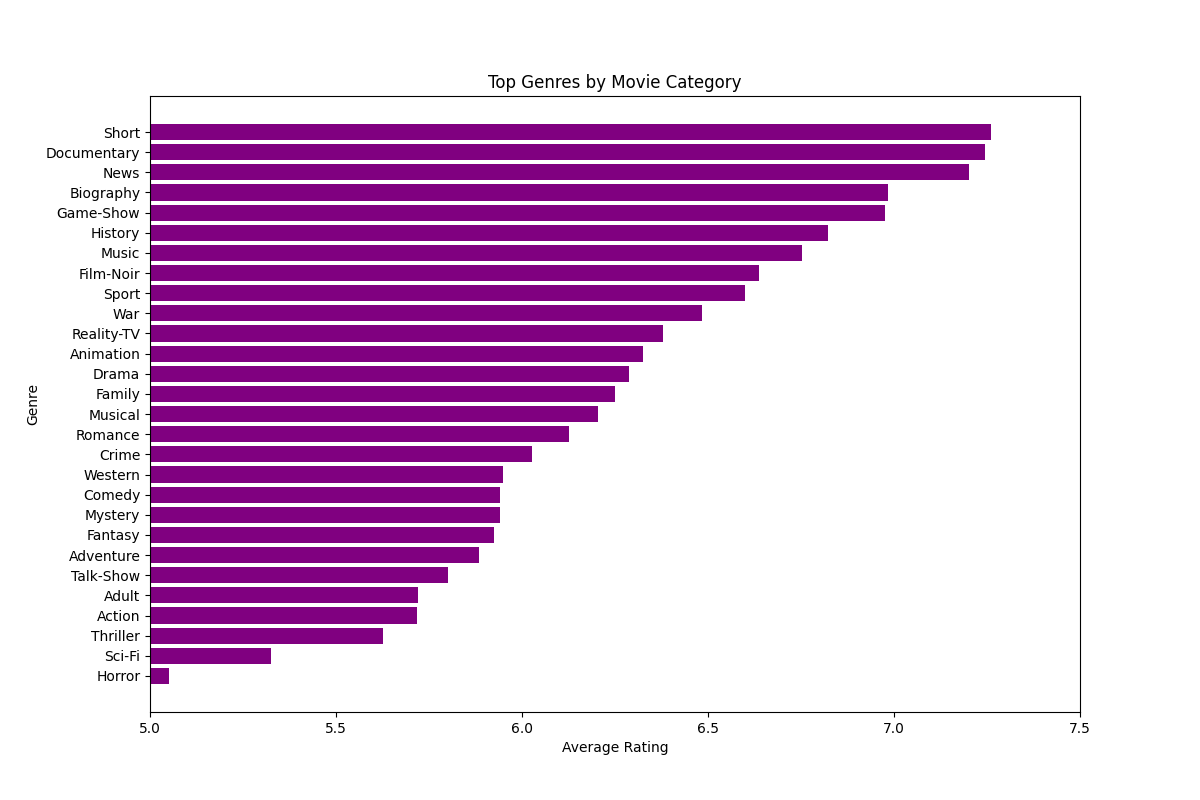

In [52]:
plt.figure(figsize=(12, 8))
plt.barh(sorted_genre_ratings["genre"], sorted_genre_ratings["averageRating"], color='purple')
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.title("Top Genres by Movie Category")
plt.xticks([5.0, 5.5, 6.0, 6.5, 7.0, 7.5])
plt.xlim(5.0, 7.5)

%matplot plt

# PART 3 - Analyzing Job Categories

## Total Unique Job Categories

**What is the total number of unique job categories?**

In [53]:
movie_actors_df.select("tconst", "category").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+---------------+
|   tconst|       category|
+---------+---------------+
|tt0000001|           self|
|tt0000001|       director|
|tt0000001|cinematographer|
|tt0000002|       director|
|tt0000002|       composer|
+---------+---------------+
only showing top 5 rows

In [54]:
movie_actors_df.select("category").distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

12

In [55]:
movie_actors_df.select("category").distinct().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+
|           category|
+-------------------+
|            actress|
|           producer|
|production_designer|
|             writer|
|              actor|
|    cinematographer|
|      archive_sound|
|    archive_footage|
|               self|
|             editor|
|           composer|
|           director|
+-------------------+

In [56]:
movie_actors_df.groupBy("category").count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------+
|           category|  count|
+-------------------+-------+
|            actress|6325097|
|           producer|2197866|
|production_designer| 285924|
|             writer|4811596|
|              actor|8493701|
|    cinematographer|1300404|
|      archive_sound|   2143|
|    archive_footage| 209035|
|               self|6153089|
|             editor|1197669|
|           composer|1313187|
|           director|4179106|
+-------------------+-------+

In [57]:
from pyspark.sql.functions import desc

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [58]:
top_jobs=movie_actors_df.groupBy("category").count().orderBy(desc("count"))
top_jobs.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-------+
|           category|  count|
+-------------------+-------+
|              actor|8493701|
|            actress|6325097|
|               self|6153089|
|             writer|4811596|
|           director|4179106|
|           producer|2197866|
|           composer|1313187|
|    cinematographer|1300404|
|             editor|1197669|
|production_designer| 285924|
|    archive_footage| 209035|
|      archive_sound|   2143|
+-------------------+-------+

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

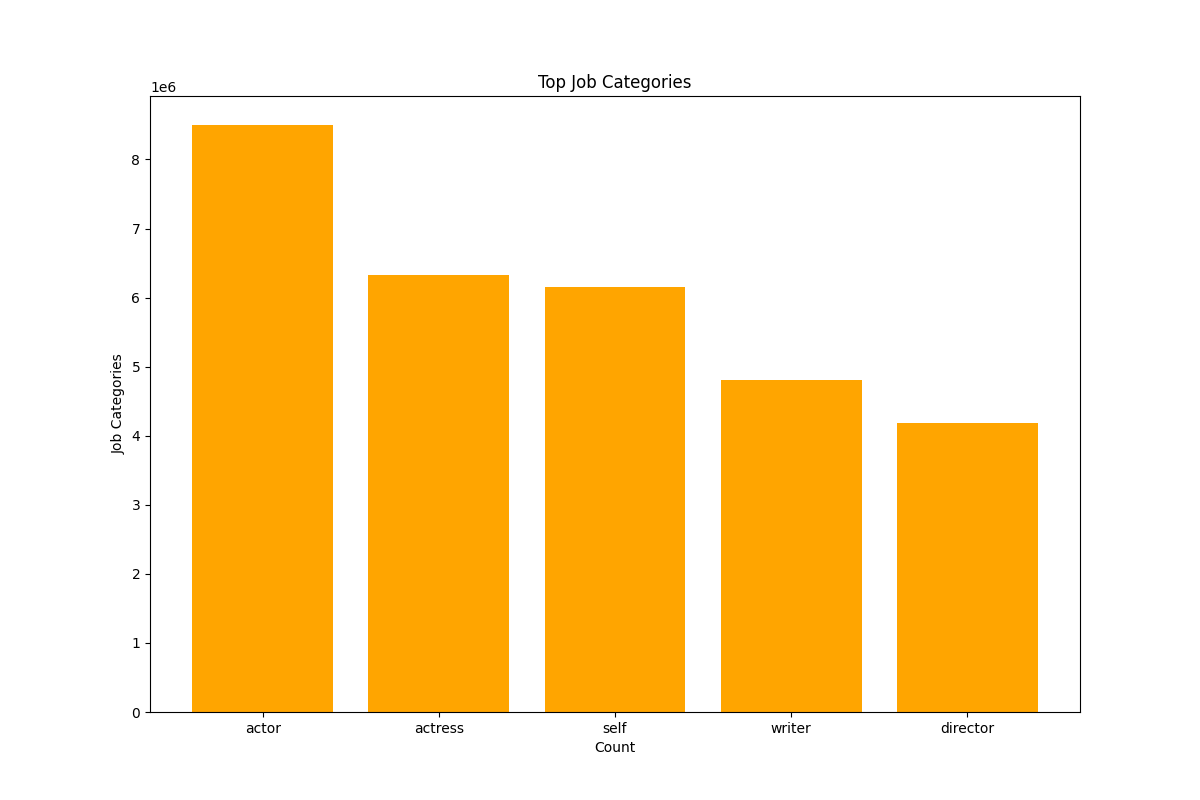

In [63]:
top_jobs= top_jobs.head(5)

plt.figure(figsize=(12, 8))
plt.bar(top_jobs["category"], top_jobs["count"], color='orange')
plt.xlabel("Count")
plt.ylabel("Job Categories")
plt.title("Top Job Categories")


%matplot plt

# PART 4 - Answer to the following questions:

## 1) Find all the "movies" featuring "Johnny Depp" and "Helena Bonham Carter".

In [64]:
jd_nconst = actors_df.filter(F.col("primaryName") == "Johnny Depp").select("nconst").collect()[0][0]
hbc_nconst = actors_df.filter(F.col("primaryName") == "Helena Bonham Carter").select("nconst").collect()[0][0]

jd_movies = movie_actors_df.filter((F.col("nconst") == jd_nconst) & (F.col("category") == "actor")).select("tconst")
hbc_movies = movie_actors_df.filter((F.col("nconst") == hbc_nconst) & (F.col("category") == "actress")).select("tconst")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [65]:
common_movies = jd_movies.join(hbc_movies, on="tconst", how="inner")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [66]:
common_movies.join(genres_df, on="tconst", how="inner").select("primaryTitle").show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------------------------------+
|primaryTitle                                  |
+----------------------------------------------+
|Dark Shadows                                  |
|Sweeney Todd: The Demon Barber of Fleet Street|
|Alice Through the Looking Glass               |
|Alice in Wonderland                           |
|Corpse Bride                                  |
|Charlie and the Chocolate Factory             |
+----------------------------------------------+

## 2) Find all the "movies" featuring "Brad Pitt" after 2010.

In [77]:
bp_nconst = actors_df.filter(F.col("primaryName") == "Brad Pitt").select("nconst").collect()[0][0]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [78]:
bp_movies = movie_actors_df.filter((F.col("nconst") == bp_nconst) & (F.col("category") == "actor")).select("tconst")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [79]:
bp_movies.join(genres_df, on="tconst", how="inner").filter((F.col("startYear") > "2010") & (F.col("startYear") != "\\N")).select("primaryTitle","startYear").show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------------------------------+---------+
|primaryTitle                            |startYear|
+----------------------------------------+---------+
|The Tree of Life                        |2011     |
|World War Z                             |2013     |
|Babylon                                 |2021     |
|The Big Short                           |2015     |
|Moneyball                               |2011     |
|Killing Them Softly                     |2012     |
|12 Years a Slave                        |2013     |
|Fury                                    |2014     |
|Ad Astra                                |2019     |
|By the Sea                              |2015     |
|The Audition                            |2015     |
|Allied                                  |2016     |
|War Machine                             |2017     |
|The Counselor                           |2013     |
|Voyage of Time: The IMAX Experience     |2016     |
|Criminal Injustice                      |2017

## 3) What is the number of "movies" "acted" by "Zendaya" per year?

In [70]:
zendaya_nconst = actors_df.filter(F.col("primaryName") == "Zendaya").select("nconst").collect()[0][0]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [80]:
zendaya_movies = movie_actors_df.filter((F.col("nconst") == zendaya_nconst) & (F.col("category") == "actress")).select("tconst")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [81]:
primary_movies = genres_df.filter(F.col("titleType") == "movie")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [82]:
zendaya_movies_joined = zendaya_movies.join(primary_movies, on="tconst", how="inner").filter((F.col("startYear") >= "2017") & (F.col("startYear") <= "2020")).select("tconst", "primaryTitle", "startYear")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [84]:
zendaya_movies_joined.groupBy("startYear").count().orderBy("startYear").show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-----+
|startYear|count|
+---------+-----+
|2017     |1    |
|2018     |2    |
|2020     |1    |
+---------+-----+

## 4) What are the "movies" by average rating greater than "9.7" and released in "2019"?

In [85]:
high_rated_movies = movie_ratings_df.filter(F.col("averageRating").cast("float") > 9.7)
movies_2019 = genres_df.filter(F.col("startYear") == "2019")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [86]:
top_rated_movies_2019 = high_rated_movies.join(movies_2019, on="tconst", how="inner").select("tconst", "primaryTitle", "averageRating", "startYear")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [87]:
top_rated_movies_2019.select("primaryTitle", "averageRating").show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------------------------------------------------------------------+-------------+
|primaryTitle                                                                    |averageRating|
+--------------------------------------------------------------------------------+-------------+
|#Busing                                                                         |10.0         |
|An Forousa Takounia Tha Imoun Travesti                                          |10.0         |
|Tha Sou Kano Minisi                                                             |10.0         |
|Five Indo Samurai                                                               |10.0         |
|NSA Whistleblower: Government Collecting Everything You Do                      |10.0         |
|Saving my Minecraft Dog At ALL COSTS!                                           |9.8          |
|Career Day Catastrophe                                                          |10.0         |
|En Uzun Gün                  

# Extra Credit 

**Find 5 active actors in last 5 years**

In [89]:
movies_2017_2022 = genres_df.filter((F.col("titleType") == "movie") & (F.col("startYear") >= "2017") & (F.col("startYear") <= "2022"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [90]:
actors_in_movies = movie_actors_df.filter((F.col("category") == "actor") | (F.col("category") == "actress"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [91]:
movies_actors = movies_2017_2022.join(actors_in_movies, on="tconst", how="inner")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [97]:
movies_actors_ratings=movies_actors.join(movie_ratings_df, on="tconst", how="inner")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [98]:
actors=movies_actors_ratings.join(actors_df, on="nconst", how="inner").groupBy("nconst", "primaryName").agg(F.count("tconst").alias("movie_count"), F.avg("averageRating").alias("average_movie_rating"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [99]:
active_actors=actors.orderBy(F.desc("movie_count")).limit(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [100]:
active_actors.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+--------------+-----------+--------------------+
|nconst   |primaryName   |movie_count|average_movie_rating|
+---------+--------------+-----------+--------------------+
|nm0000616|Eric Roberts  |42         |5.352380952380953   |
|nm6489058|Yogi Babu     |30         |5.420000000000002   |
|nm5954636|Sergey A.     |28         |6.410714285714285   |
|nm8337120|Kj Schrock    |27         |5.103703703703703   |
|nm3792384|Karamjit Anmol|25         |6.303999999999999   |
+---------+--------------+-----------+--------------------+

In [101]:
active_actors_df=active_actors.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

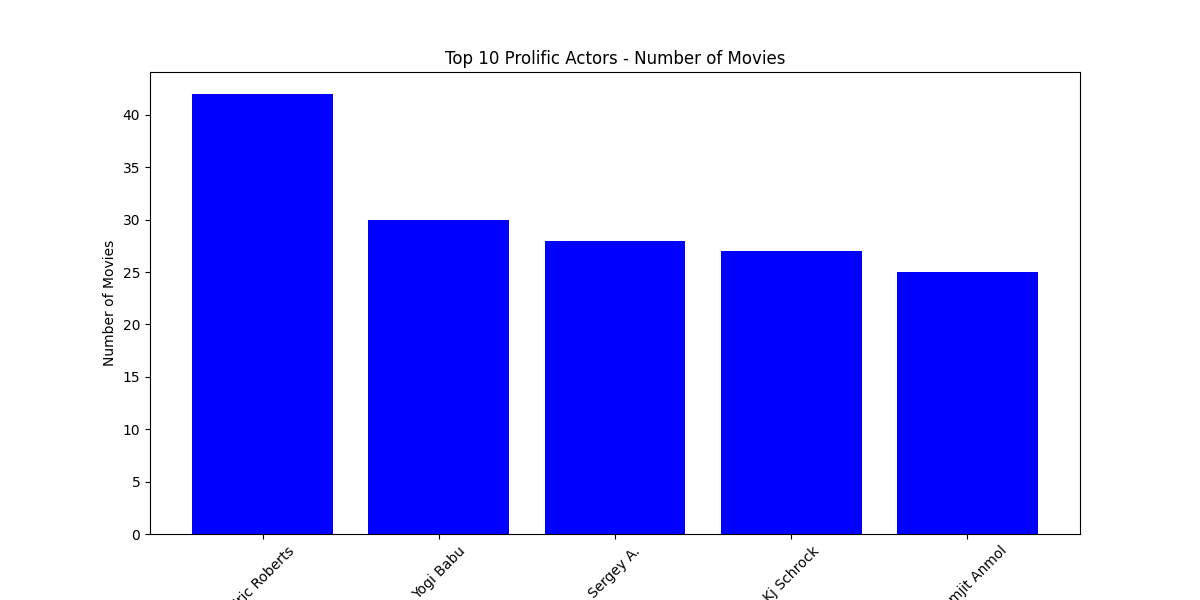

In [104]:
plt.figure(figsize=(12, 6))
plt.bar(active_actors_df["primaryName"], active_actors_df["movie_count"], color='blue')
plt.xlabel("Actors")
plt.ylabel("Number of Movies")
plt.title("Top 5 Active Actors - Number of Movies")
plt.xticks(rotation=45)
plt.show()

%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

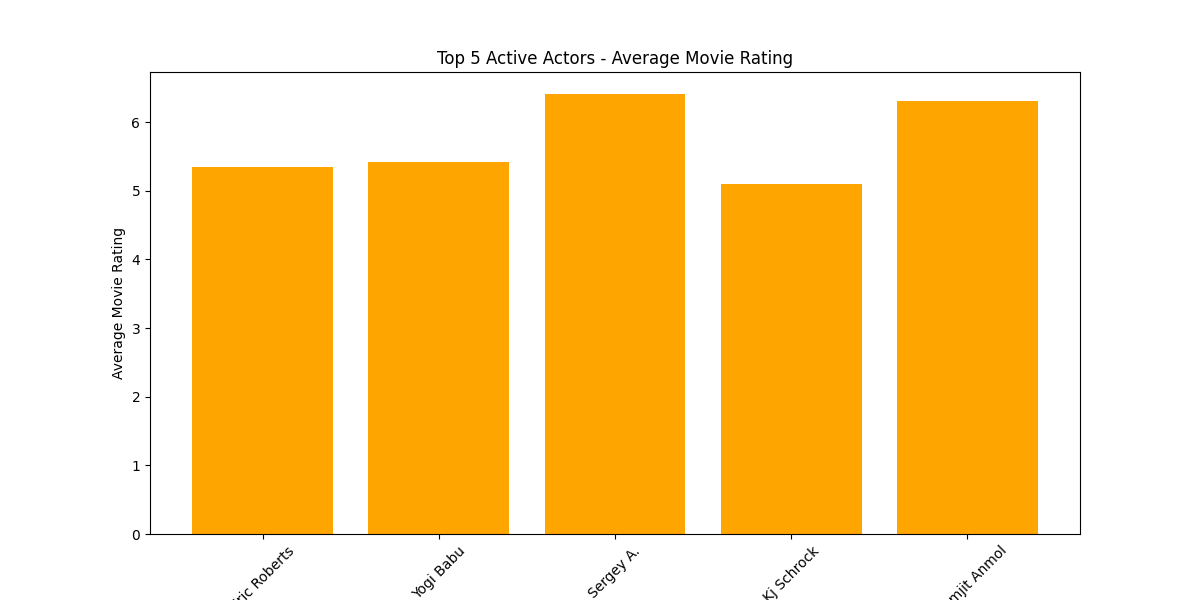

In [105]:
plt.figure(figsize=(12, 6))
plt.bar(active_actors_df["primaryName"], active_actors_df["average_movie_rating"], color='orange')
plt.xlabel("Actors")
plt.ylabel("Average Movie Rating")
plt.title("Top 5 Active Actors - Average Movie Rating")
plt.xticks(rotation=45)
plt.show()

%matplot plt